In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import joypy

%load_ext watermark
%watermark -iv

numpy      1.16.2
joypy      0.2.1
pandas     0.24.2
matplotlib 3.0.3



In [2]:
df = pd.read_excel('reading.xlsx')#,converters = {'Title':str,
#                                                 'Author':str,
#                                                 'Type':str,
#                                                 'Read':int,
#                                                 'Published':int,
#                                                 'Pages':int,
#                                                 'Notes':str,
#                                                 'Reflection':str})#.fillna('')
df.Read = df.Read.fillna(9999).astype(int)
df.Published = df.fillna(9999).Published.astype(int)
df.head(20)

,Title,Author,Type,Read,Published,Pages,Notes,Reflection
0,Voyager: The Flying Adventure of a Lifetime,Jeana Yeager & Dick Rutan,Book,2005,9999,NaN,NaN,NaN
1,Hatchet,Gary Paulsen,Book,2005,9999,NaN,NaN,NaN
2,The River,Gary Paulsen,Book,2005,9999,NaN,NaN,NaN
3,Brian's Winter,Gary Paulsen,Book,2005,9999,NaN,NaN,NaN
4,Brian's Return,Gary Paulsen,Book,2005,9999,NaN,NaN,NaN
5,Brian's Hunt,Gary Paulsen,Book,2005,9999,NaN,NaN,NaN
6,Shiloh,Phyllis Reynolds Naylor,Book,2005,9999,NaN,NaN,NaN
7,Holes,Louis Sachar,Book,2005,9999,NaN,NaN,NaN
8,Of Mice and Men,John Steinbeck,Book,2005,9999,NaN,NaN,NaN
9,The Pearl,John Steinbeck,Book,2005,9999,NaN,NaN,NaN


In [3]:
table = pd.pivot_table(df,
                       index=['Type'],
                       columns=['Read'],
                       values=['Title'],
                       margins=True,
                       margins_name='Total',
                       aggfunc=[len])
table.columns = table.columns.droplevel(1)
table.columns = table.columns.droplevel(0)
table.fillna('')

Read,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Type,,,,,,,,,,,,,,,,
Audiobook,,,,,,,5,,1,5,10,43.0,52.0,50.0,33.0,199
Book,33,13,14,17,22,26,19,31,36,33,25,23.0,29.0,27.0,44.0,392
Library,,,,,,,,,3,4,1,7.0,10.0,26.0,11.0,62
PDF,,,,,,,,,2,6,5,5.0,2.0,3.0,4.0,27
eBook,,,,,,,,,,,,10.0,10.0,3.0,1.0,24
Total,33,13,14,17,22,26,24,31,42,48,41,88.0,103.0,109.0,93.0,704


(<Figure size 360x576 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a15d05860>])

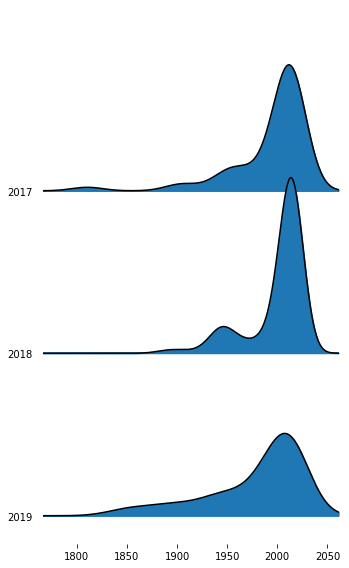

In [4]:
dfjoy = df[(df.Read.isin([2017,2018,2019]))
           & (df.Published>1800)
           & (df.Published!=9999)
          ]
# fig, axes = joypy.joyplot(dfjoy, by='Read', column='Published',figsize=(5,8))
# plt.show()
joypy.joyplot(dfjoy, by='Read', column='Published',figsize=(5,8))

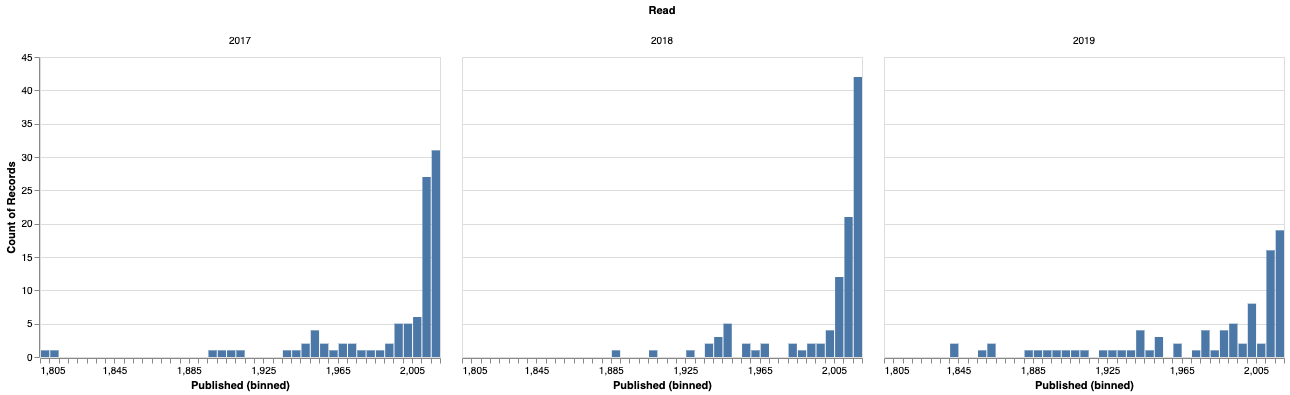

In [5]:
import altair as alt
alt.renderers.enable('notebook') # https://altair-viz.github.io/user_guide/renderers.html
# alt.data_transformers.enable('json') # https://altair-viz.github.io/user_guide/faq.html

source = df[(df.Read.isin([2017,2018,2019]))
           & (df.Published>1800)
           & (df.Published!=9999)
          ]


alt.Chart(source).mark_bar().encode(
    alt.X('Published:Q', bin=alt.BinParams(maxbins=50)),
    y='count()',
    column = 'Read'
)

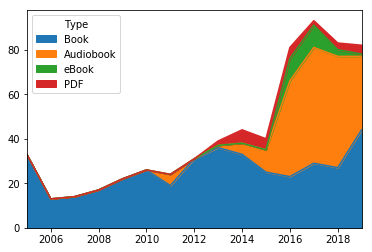

In [6]:
dfPlot = (df
 .groupby(['Read','Type'])
 .size()
 .unstack()
)
# dfPlot = dfPlot[['Book','Audiobook','Library','eBook','PDF']]
dfPlot = dfPlot[['Book','Audiobook','eBook','PDF']]
dfPlot.plot.area()

plt.style.use('clean')
plt.gca().set_xlabel('')
plt.gca().xaxis.grid(False)
# plt.savefig('chart.png', dpi = 350)

In [7]:
df[df['Read'].isin([2017,2018,2019])]



,Title,Author,Type,Read,Published,Pages,Notes,Reflection
399,So Good They Can't Ignore You: Why Skills Trum...,Cal Newport,Book,2017,2012,267.0,NaN,NaN
400,Pride & Prejudice,Jane Austen,Audiobook,2017,1813,480.0,NaN,I watched the movie several years years ago bu...
401,Shoe Dog,Phil Knight,Audiobook,2017,2016,400.0,NaN,NaN
402,Rise of the Robots: Technology and the Threat ...,Martin Ford,Library,2017,2016,368.0,NaN,NaN
403,The Inner Game of Tennis,W. Timothy Gallwey,Audiobook,2017,1997,122.0,NaN,I decided to read this because I had wanted to...
404,Faust,Johann Wolfgang von Goethe,Audiobook,2017,1808,158.0,NaN,I decided this year when travelling to try to ...
405,Legacy,James Kerr,Book,2017,2013,224.0,NaN,NaN
406,Moneyball,Michael Lewis,Audiobook,2017,2004,320.0,NaN,NaN
407,Hillbilly Elegy: A Memoir of a Family and Cult...,J.D. Vance,Book,2017,2016,272.0,NaN,NaN
408,Mornings on Horseback: The Story of an Extraor...,David McCullough,Audiobook,2017,1982,480.0,NaN,NaN
